In [1]:
import os
import numpy as np

train_root = '/mnt/nas_siddharth/dataset/id_macaque_mff1y/train'
classes = ['b', 'd', 'g', 'r', 'unknown', 'w']
counts = []

for cls in classes:
    cls_dir = os.path.join(train_root, cls)
    n = len([f for f in os.listdir(cls_dir) if f.lower().endswith(('.jpg', '.png', '.jpeg'))])
    counts.append(n)
    print(f"Class {cls}: {n} samples")

print("Counts:", counts)


Class b: 176 samples
Class d: 50 samples
Class g: 121 samples
Class r: 165 samples
Class unknown: 1340 samples
Class w: 52 samples
Counts: [176, 50, 121, 165, 1340, 52]


In [3]:
counts = [176 , 50,121 ,165 ,1340 ,52 ]
num_classes = len(counts)
total_samples = sum(counts)

weights = [total_samples / (num_classes * c) for c in counts]
print("class_weight =", weights)

class_weight = [1.803030303030303, 6.346666666666667, 2.6225895316804406, 1.9232323232323232, 0.23681592039800994, 6.102564102564102]


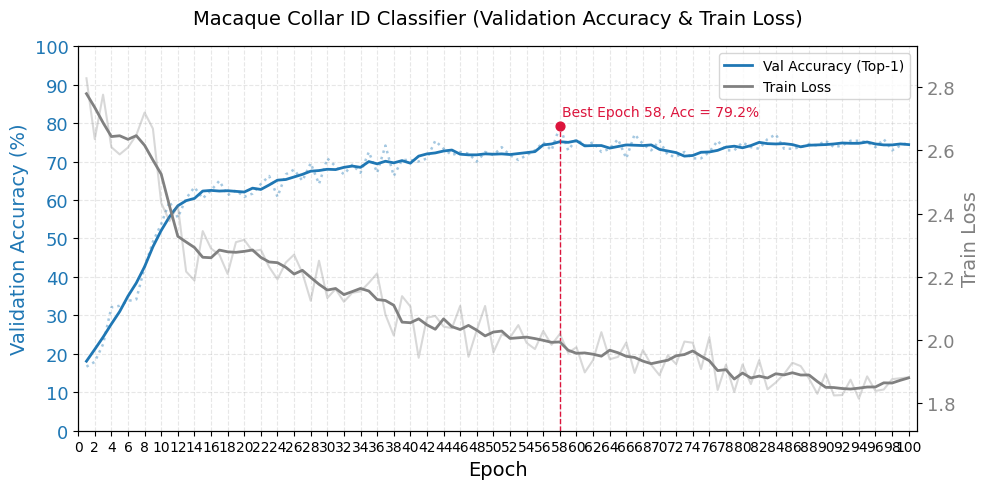

In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt

def moving_average(arr, window=5):
    arr = np.asarray(arr, dtype=float)
    if window < 2:
        return arr
    pad_left = window // 2
    pad_right = window - 1 - pad_left
    padded = np.pad(arr, (pad_left, pad_right), mode='edge')
    return np.convolve(padded, np.ones(window)/window, mode='valid')

json_log = '/mnt/nas_siddharth/collar_id_classifier/training/20250603_134555/vis_data/20250603_134555.json'

# Parse logs
epoch_loss = {}
val_epochs = []
val_acc = []

with open(json_log, 'r') as f:
    for line in f:
        rec = json.loads(line)
        # Training step
        if 'loss' in rec and 'epoch' in rec:
            ep = int(rec['epoch'])
            epoch_loss.setdefault(ep, []).append(float(rec['loss']))
        # Validation metric
        if 'accuracy/top1' in rec and 'step' in rec and 'loss' not in rec:
            # Only per-epoch val step, not per-iter training step
            val_epochs.append(int(rec['step']))
            val_acc.append(float(rec['accuracy/top1']))

# Convert to arrays
val_epochs = np.array(val_epochs)
val_acc = np.array(val_acc)
train_epochs = np.array(sorted(epoch_loss.keys()))
avg_loss = np.array([np.mean(epoch_loss[ep]) for ep in train_epochs])

# Find best validation accuracy
best_idx = np.argmax(val_acc)
best_epoch = int(val_epochs[best_idx])
best_acc_val = float(val_acc[best_idx])

val_acc_smooth = moving_average(val_acc, window=5)
avg_loss_smooth = moving_average(avg_loss, window=5)

fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.set_xlabel("Epoch", fontsize=14)
ax1.set_ylabel("Validation Accuracy (%)", fontsize=14, color='tab:blue')
ax1.grid(True, linestyle='--', alpha=0.3)
ax1.set_ylim(0, 100)
ax1.set_xlim(0, max(val_epochs) + 1)
ax1.set_xticks(np.arange(0, max(val_epochs) + 1, 2))
ax1.set_yticks(np.arange(0, 101, 10))
ax1.tick_params(labelsize=13, axis='y', labelcolor='tab:blue')

# Validation accuracy
ax1.plot(val_epochs, val_acc, color='tab:blue', linestyle=':', alpha=0.4, linewidth=1.8)
ax1.plot(val_epochs, val_acc_smooth, color='tab:blue', linestyle='-', linewidth=2, label='Val Accuracy (Top-1)')
ax1.scatter(best_epoch, best_acc_val, s=40, color='crimson', zorder=10)
ax1.vlines(x=best_epoch, ymin=0, ymax=best_acc_val, color='crimson', linestyle='--', linewidth=1)
ax1.text(best_epoch + 0.2, best_acc_val + 2,
         f"Best Epoch {best_epoch}, Acc = {best_acc_val:.1f}%",
         color='crimson', fontsize=10, ha='left', va='bottom')

lines1, labels1 = ax1.get_legend_handles_labels()

# Training loss
ax2 = ax1.twinx()
ax2.set_ylabel("Train Loss", color='gray', fontsize=14)
ax2.tick_params(axis='y', labelcolor='gray', labelsize=13)

ax2.plot(train_epochs, avg_loss, color='gray', linestyle='-', linewidth=1.5, alpha=0.3)
ax2.plot(train_epochs, avg_loss_smooth, color='gray', linestyle='-', linewidth=2.0, label='Train Loss')

loss_min, loss_max = avg_loss.min(), avg_loss.max()
margin = 0.1 * (loss_max - loss_min)
ax2.set_ylim(loss_min - margin, loss_max + margin)

lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right', frameon=True, fontsize=10)

plt.title("Macaque Collar ID Classifier (Validation Accuracy & Train Loss)", fontsize=14, pad=16)
plt.subplots_adjust(left=0.10, right=0.88, top=0.87, bottom=0.14)
plt.tight_layout()
plt.show()


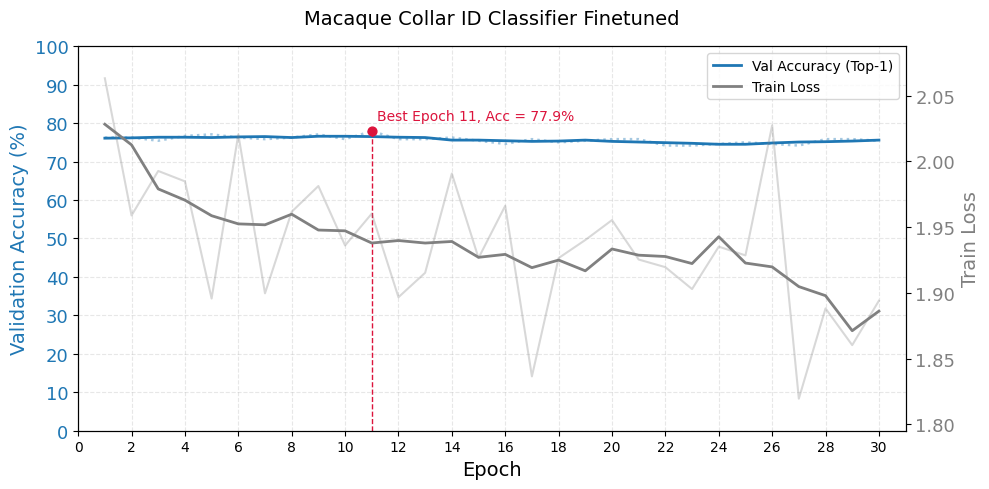

In [4]:
import json
import numpy as np
import matplotlib.pyplot as plt

def moving_average(arr, window=5):
    arr = np.asarray(arr, dtype=float)
    if window < 2:
        return arr
    pad_left = window // 2
    pad_right = window - 1 - pad_left
    padded = np.pad(arr, (pad_left, pad_right), mode='edge')
    return np.convolve(padded, np.ones(window)/window, mode='valid')

json_log = '/mnt/nas_siddharth/collar_id_classifier/training_finetuned/20250605_151245/vis_data/20250605_151245.json'

# Parse logs
epoch_loss = {}
val_epochs = []
val_acc = []

with open(json_log, 'r') as f:
    for line in f:
        rec = json.loads(line)
        # Training step
        if 'loss' in rec and 'epoch' in rec:
            ep = int(rec['epoch'])
            epoch_loss.setdefault(ep, []).append(float(rec['loss']))
        # Validation metric
        if 'accuracy/top1' in rec and 'step' in rec and 'loss' not in rec:
            # Only per-epoch val step, not per-iter training step
            val_epochs.append(int(rec['step']))
            val_acc.append(float(rec['accuracy/top1']))

# Convert to arrays
val_epochs = np.array(val_epochs)
val_acc = np.array(val_acc)
train_epochs = np.array(sorted(epoch_loss.keys()))
avg_loss = np.array([np.mean(epoch_loss[ep]) for ep in train_epochs])

# Find best validation accuracy
best_idx = np.argmax(val_acc)
best_epoch = int(val_epochs[best_idx])
best_acc_val = float(val_acc[best_idx])

val_acc_smooth = moving_average(val_acc, window=5)
avg_loss_smooth = moving_average(avg_loss, window=5)

fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.set_xlabel("Epoch", fontsize=14)
ax1.set_ylabel("Validation Accuracy (%)", fontsize=14, color='tab:blue')
ax1.grid(True, linestyle='--', alpha=0.3)
ax1.set_ylim(0, 100)
ax1.set_xlim(0, max(val_epochs) + 1)
ax1.set_xticks(np.arange(0, max(val_epochs) + 1, 2))
ax1.set_yticks(np.arange(0, 101, 10))
ax1.tick_params(labelsize=13, axis='y', labelcolor='tab:blue')

# Validation accuracy
ax1.plot(val_epochs, val_acc, color='tab:blue', linestyle=':', alpha=0.4, linewidth=1.8)
ax1.plot(val_epochs, val_acc_smooth, color='tab:blue', linestyle='-', linewidth=2, label='Val Accuracy (Top-1)')
ax1.scatter(best_epoch, best_acc_val, s=40, color='crimson', zorder=10)
ax1.vlines(x=best_epoch, ymin=0, ymax=best_acc_val, color='crimson', linestyle='--', linewidth=1)
ax1.text(best_epoch + 0.2, best_acc_val + 2,
         f"Best Epoch {best_epoch}, Acc = {best_acc_val:.1f}%",
         color='crimson', fontsize=10, ha='left', va='bottom')

lines1, labels1 = ax1.get_legend_handles_labels()

# Training loss
ax2 = ax1.twinx()
ax2.set_ylabel("Train Loss", color='gray', fontsize=14)
ax2.tick_params(axis='y', labelcolor='gray', labelsize=13)

ax2.plot(train_epochs, avg_loss, color='gray', linestyle='-', linewidth=1.5, alpha=0.3)
ax2.plot(train_epochs, avg_loss_smooth, color='gray', linestyle='-', linewidth=2.0, label='Train Loss')

loss_min, loss_max = avg_loss.min(), avg_loss.max()
margin = 0.1 * (loss_max - loss_min)
ax2.set_ylim(loss_min - margin, loss_max + margin)

lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right', frameon=True, fontsize=10)

plt.title("Macaque Collar ID Classifier Finetuned", fontsize=14, pad=16)
plt.subplots_adjust(left=0.10, right=0.88, top=0.87, bottom=0.14)
plt.tight_layout()
plt.show()


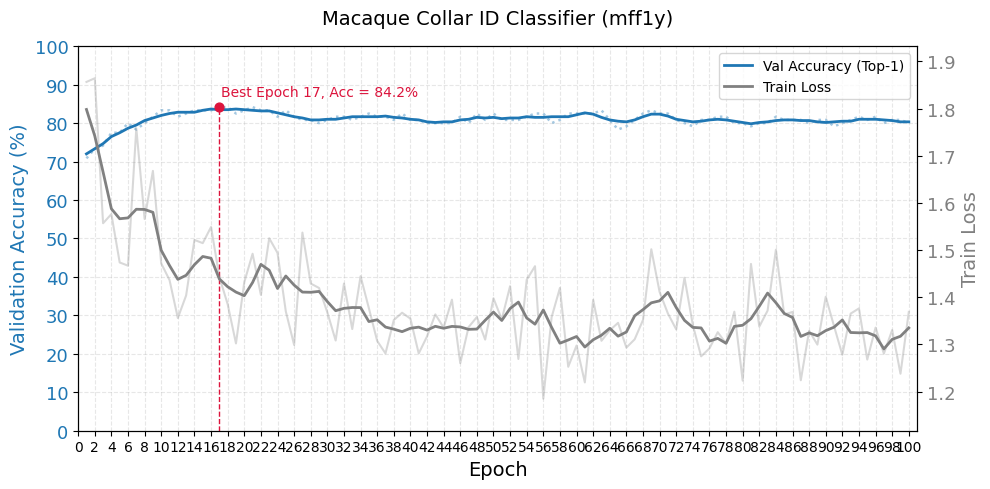

In [7]:
import json
import numpy as np
import matplotlib.pyplot as plt

def moving_average(arr, window=5):
    arr = np.asarray(arr, dtype=float)
    if window < 2:
        return arr
    pad_left = window // 2
    pad_right = window - 1 - pad_left
    padded = np.pad(arr, (pad_left, pad_right), mode='edge')
    return np.convolve(padded, np.ones(window)/window, mode='valid')

json_log = '/mnt/nas_siddharth/collar_id_classifier_mff1y/training/20250605_150153/vis_data/20250605_150153.json'

# Parse logs
epoch_loss = {}
val_epochs = []
val_acc = []

with open(json_log, 'r') as f:
    for line in f:
        rec = json.loads(line)
        # Training step
        if 'loss' in rec and 'epoch' in rec:
            ep = int(rec['epoch'])
            epoch_loss.setdefault(ep, []).append(float(rec['loss']))
        # Validation metric
        if 'accuracy/top1' in rec and 'step' in rec and 'loss' not in rec:
            # Only per-epoch val step, not per-iter training step
            val_epochs.append(int(rec['step']))
            val_acc.append(float(rec['accuracy/top1']))

# Convert to arrays
val_epochs = np.array(val_epochs)
val_acc = np.array(val_acc)
train_epochs = np.array(sorted(epoch_loss.keys()))
avg_loss = np.array([np.mean(epoch_loss[ep]) for ep in train_epochs])

# Find best validation accuracy
best_idx = np.argmax(val_acc)
best_epoch = int(val_epochs[best_idx])
best_acc_val = float(val_acc[best_idx])

val_acc_smooth = moving_average(val_acc, window=5)
avg_loss_smooth = moving_average(avg_loss, window=5)

fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.set_xlabel("Epoch", fontsize=14)
ax1.set_ylabel("Validation Accuracy (%)", fontsize=14, color='tab:blue')
ax1.grid(True, linestyle='--', alpha=0.3)
ax1.set_ylim(0, 100)
ax1.set_xlim(0, max(val_epochs) + 1)
ax1.set_xticks(np.arange(0, max(val_epochs) + 1, 2))
ax1.set_yticks(np.arange(0, 101, 10))
ax1.tick_params(labelsize=13, axis='y', labelcolor='tab:blue')

# Validation accuracy
ax1.plot(val_epochs, val_acc, color='tab:blue', linestyle=':', alpha=0.4, linewidth=1.8)
ax1.plot(val_epochs, val_acc_smooth, color='tab:blue', linestyle='-', linewidth=2, label='Val Accuracy (Top-1)')
ax1.scatter(best_epoch, best_acc_val, s=40, color='crimson', zorder=10)
ax1.vlines(x=best_epoch, ymin=0, ymax=best_acc_val, color='crimson', linestyle='--', linewidth=1)
ax1.text(best_epoch + 0.2, best_acc_val + 2,
         f"Best Epoch {best_epoch}, Acc = {best_acc_val:.1f}%",
         color='crimson', fontsize=10, ha='left', va='bottom')

lines1, labels1 = ax1.get_legend_handles_labels()

# Training loss
ax2 = ax1.twinx()
ax2.set_ylabel("Train Loss", color='gray', fontsize=14)
ax2.tick_params(axis='y', labelcolor='gray', labelsize=13)

ax2.plot(train_epochs, avg_loss, color='gray', linestyle='-', linewidth=1.5, alpha=0.3)
ax2.plot(train_epochs, avg_loss_smooth, color='gray', linestyle='-', linewidth=2.0, label='Train Loss')

loss_min, loss_max = avg_loss.min(), avg_loss.max()
margin = 0.1 * (loss_max - loss_min)
ax2.set_ylim(loss_min - margin, loss_max + margin)

lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right', frameon=True, fontsize=10)

plt.title("Macaque Collar ID Classifier (mff1y)", fontsize=14, pad=16)
plt.subplots_adjust(left=0.10, right=0.88, top=0.87, bottom=0.14)
plt.tight_layout()
plt.show()


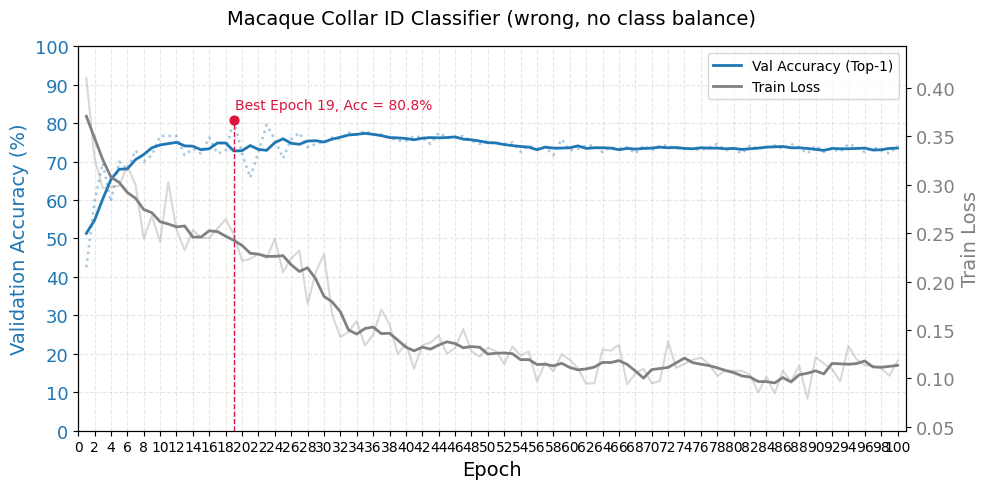

In [9]:
import json
import numpy as np
import matplotlib.pyplot as plt

def moving_average(arr, window=5):
    arr = np.asarray(arr, dtype=float)
    if window < 2:
        return arr
    pad_left = window // 2
    pad_right = window - 1 - pad_left
    padded = np.pad(arr, (pad_left, pad_right), mode='edge')
    return np.convolve(padded, np.ones(window)/window, mode='valid')

json_log = '/mnt/nas_siddharth/sn_resnet152_8xb32_in1k_pretrained/20250522_004909/vis_data/20250522_004909.json'

# Parse logs
epoch_loss = {}
val_epochs = []
val_acc = []

with open(json_log, 'r') as f:
    for line in f:
        rec = json.loads(line)
        # Training step
        if 'loss' in rec and 'epoch' in rec:
            ep = int(rec['epoch'])
            epoch_loss.setdefault(ep, []).append(float(rec['loss']))
        # Validation metric
        if 'accuracy/top1' in rec and 'step' in rec and 'loss' not in rec:
            # Only per-epoch val step, not per-iter training step
            val_epochs.append(int(rec['step']))
            val_acc.append(float(rec['accuracy/top1']))

# Convert to arrays
val_epochs = np.array(val_epochs)
val_acc = np.array(val_acc)
train_epochs = np.array(sorted(epoch_loss.keys()))
avg_loss = np.array([np.mean(epoch_loss[ep]) for ep in train_epochs])

# Find best validation accuracy
best_idx = np.argmax(val_acc)
best_epoch = int(val_epochs[best_idx])
best_acc_val = float(val_acc[best_idx])

val_acc_smooth = moving_average(val_acc, window=5)
avg_loss_smooth = moving_average(avg_loss, window=5)

fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.set_xlabel("Epoch", fontsize=14)
ax1.set_ylabel("Validation Accuracy (%)", fontsize=14, color='tab:blue')
ax1.grid(True, linestyle='--', alpha=0.3)
ax1.set_ylim(0, 100)
ax1.set_xlim(0, max(val_epochs) + 1)
ax1.set_xticks(np.arange(0, max(val_epochs) + 1, 2))
ax1.set_yticks(np.arange(0, 101, 10))
ax1.tick_params(labelsize=13, axis='y', labelcolor='tab:blue')

# Validation accuracy
ax1.plot(val_epochs, val_acc, color='tab:blue', linestyle=':', alpha=0.4, linewidth=1.8)
ax1.plot(val_epochs, val_acc_smooth, color='tab:blue', linestyle='-', linewidth=2, label='Val Accuracy (Top-1)')
ax1.scatter(best_epoch, best_acc_val, s=40, color='crimson', zorder=10)
ax1.vlines(x=best_epoch, ymin=0, ymax=best_acc_val, color='crimson', linestyle='--', linewidth=1)
ax1.text(best_epoch + 0.2, best_acc_val + 2,
         f"Best Epoch {best_epoch}, Acc = {best_acc_val:.1f}%",
         color='crimson', fontsize=10, ha='left', va='bottom')

lines1, labels1 = ax1.get_legend_handles_labels()

# Training loss
ax2 = ax1.twinx()
ax2.set_ylabel("Train Loss", color='gray', fontsize=14)
ax2.tick_params(axis='y', labelcolor='gray', labelsize=13)

ax2.plot(train_epochs, avg_loss, color='gray', linestyle='-', linewidth=1.5, alpha=0.3)
ax2.plot(train_epochs, avg_loss_smooth, color='gray', linestyle='-', linewidth=2.0, label='Train Loss')

loss_min, loss_max = avg_loss.min(), avg_loss.max()
margin = 0.1 * (loss_max - loss_min)
ax2.set_ylim(loss_min - margin, loss_max + margin)

lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right', frameon=True, fontsize=10)

plt.title("Macaque Collar ID Classifier (wrong, no class balance)", fontsize=14, pad=16)
plt.subplots_adjust(left=0.10, right=0.88, top=0.87, bottom=0.14)
plt.tight_layout()
plt.show()
